In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

#metoda prostokątów
def integrate(f, a, b, n=1000):
    x= np.linspace(a, b, n)
    dx= (b-a) /n
    integral= np.sum(f(x))*dx
    return integral

#metoda ilorazu różnicowego
def derivative(f, x0, dx=0.01):
    return (f(x0+dx)-f(x0-dx))/(2*dx)


f= lambda x: x**2
print("intagral f(x)=x^2 (0-1):", integrate(f, 0, 1))
print("derivative f(x)=x^2  (x=1):", derivative(f, 1))


intagral f(x)=x^2 (0-1): 0.33350016683350014
derivative f(x)=x^2  (x=1): 2.0000000000000018


In [9]:
from sympy import symbols, hermite

x= symbols('x')
H_0= hermite(0, x)
H_1= hermite(1, x)
H_2= hermite(2, x)
H_3= hermite(3, x)
H_4= hermite(4, x)


print("first five Hermite polynomials")
print(H_0)
print(H_1)
print(H_2)
print(H_3)
print(H_4)


first five Hermite polynomials
1
2*x
4*x**2 - 2
8*x**3 - 12*x
16*x**4 - 48*x**2 + 12


<ipython-input-10-fcb953d3728b>:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coef=(1/np.sqrt(2**n * np.math.factorial(n)))* (1 / np.pi**0.25)


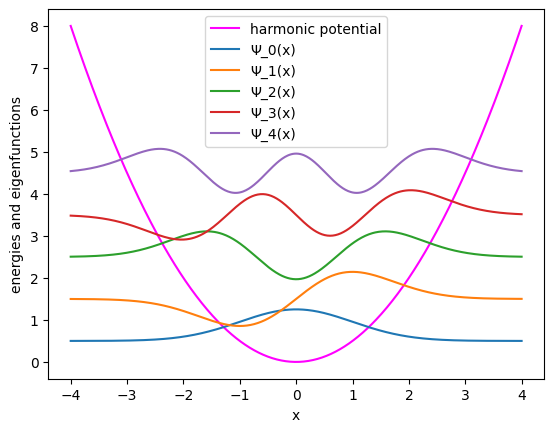

In [10]:
import matplotlib.pyplot as plt
from scipy.special import eval_hermite

#funkcja wlasna
def psi_n(n, x):
    coef=(1/np.sqrt(2**n * np.math.factorial(n)))* (1 / np.pi**0.25)
    hermite_polynomial= eval_hermite(n, x)
    return coef*np.exp(-x**2/2)*hermite_polynomial

x = np.linspace(-4,4,500)
pot=0.5*x**2

plt.plot(x, pot, label="harmonic potential", color="magenta")
for n in range(5):
    psi= psi_n(n, x)+n+0.5
    plt.plot(x, psi,label=f"Ψ_{n}(x)")

plt.xlabel("x")
plt.ylabel("energies and eigenfunctions")
plt.legend()
plt.show()


In [5]:
#2.3
def psi_n(n, x):
    coef=(1 / np.sqrt(2**n*np.math.factorial(n)))*(1 / np.pi**0.25)
    hermite_polynomial= eval_hermite(n, x)
    return coef*np.exp(-x**2 /2)*hermite_polynomial

n=0
f_squared=lambda x: np.abs(psi_n(n, x))**2
a,b= -10, 10  # przyblizanie integralnej granicy


normalization = integrate(f_squared, a, b)
print(f"normalizacja dla Ψ_{n}(x): {normalization}")
# !! result is close to 1 (0.9990000000000003) (n=0) !!


normalizacja dla Ψ_0(x): 0.9990000000000003


<ipython-input-5-f2f6265f7a64>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coef = (1 / np.sqrt(2**n * np.math.factorial(n))) * (1 / np.pi**0.25)


In [7]:
#2.4
def expectation_value_x(n,a=-10, b=10):
    f=lambda x: np.abs(psi_n(n, x))**2*x
    return integrate(f,a,b)

def expectation_value_x2(n,a=-10, b=10):
    f=lambda x: np.abs(psi_n(n, x))**2*x**2
    return integrate(f,a,b)

def expectation_value_p(n,a=-10, b=10, dx=0.01):
    f=lambda x: psi_n(n, x)
    f_star =lambda x: np.conjugate(psi_n(n, x))
    dp=lambda x: (f(x + dx) - f(x- dx)) / (2 * dx)  #pochodna
    integrand= lambda x: f_star(x)*(-1j) * dp(x)
    return integrate(integrand,a,b)

def expectation_value_p2(n,a=-10, b=10, dx=0.01):
    f=lambda x: psi_n(n, x)
    f_star=lambda x: np.conjugate(psi_n(n, x))
    dp2=lambda x: (psi_n(n,x+ dx)- 2*psi_n(n, x)+ psi_n(n,x-dx))/(dx**2)  #2 pochodna
    integrand=lambda x: f_star(x)*(-dp2(x))
    return integrate(integrand,a,b)

#obliczenia dla stanu podstawowego  n=0
n= 0
x_mean= expectation_value_x(n)
x2_mean= expectation_value_x2(n)
p_mean= expectation_value_p(n)
p2_mean= expectation_value_p2(n)

print(f"⟨x⟩ for n={n}: {x_mean}")
print(f"⟨x^2⟩ for n={n}: {x2_mean}")
print(f"⟨p⟩ for n={n}: {p_mean}")
print(f"⟨p^2⟩ for n={n}: {p2_mean}")


⟨x⟩ for n=0: 7.105427357601002e-17
⟨x^2⟩ for n=0: 0.49950000000000017
⟨p⟩ for n=0: 3.552713678800501e-17j
⟨p^2⟩ for n=0: 0.499493756301978


<ipython-input-6-063bfa7c0358>:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coef = (1 / np.sqrt(2**n * np.math.factorial(n))) * (1 / np.pi**0.25)


In [ ]:
#2.5
#obliczamy nieoznazconosc
def uncertainty_x(n):
    x_mean = expectation_value_x(n)
    x2_mean = expectation_value_x2(n)
    return np.sqrt(x2_mean - x_mean**2)

def uncertainty_p(n):
    p_mean = expectation_value_p(n)
    p2_mean = expectation_value_p2(n)
    return np.sqrt(p2_mean - p_mean**2)

#result (n=0)
delta_x = uncertainty_x(n)
delta_p = uncertainty_p(n)
uncertainty = delta_x * delta_p

print(f"Δx for n={n}: {delta_x}")
print(f"Δp for n={n}: {delta_p}")
print(f"Δx Δp for n={n}: {uncertainty}") #and i get value ~1/2 (0,49949)
print("Δx Δp >= 1/2?", uncertainty >= 0.50)


Δx for n=0: 0.7067531393633849
Δp for n=0: (0.7067487221792326+0j)
Δx Δp for n=0: (0.49949687814123334+0j)
Δx Δp >= 1/2? False


<ipython-input-4-f2f6265f7a64>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coef = (1 / np.sqrt(2**n * np.math.factorial(n))) * (1 / np.pi**0.25)


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


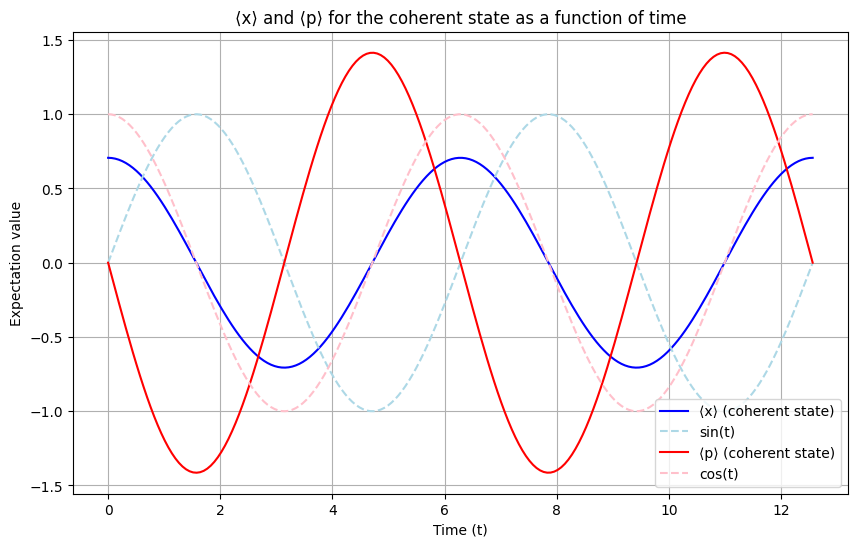

In [ ]:
#2.6-2.7
def coherent_state(x, t, alpha=1/np.sqrt(2)):
    phase = alpha * np.exp(-1j * t)
    return (1 / np.pi**0.25) * np.exp(-0.5 * (x - np.real(phase))**2 + 1j * np.imag(phase) * x)

#range of time from 0 to 4pi and calculate <x>,<p>
def expectation_x_coherent(t, dx=0.01):
    f = lambda x: np.abs(coherent_state(x, t))**2 * x
    return integrate(f, -10, 10)

def expectation_p_coherent(t, dx=0.01):
    f = lambda x: np.conjugate(coherent_state(x, t)) * (-1j * np.gradient(coherent_state(x, t), dx))
    return integrate(f, -10, 10)

#time
times = np.linspace(0, 4 * np.pi, 200)
x_means = [expectation_x_coherent(t) for t in times]
p_means = [expectation_p_coherent(t) for t in times]

#sin(t), cos(t)
sin_t = np.sin(times)
cos_t = np.cos(times)



plt.figure(figsize=(10, 6))
plt.plot(times, x_means, label="⟨x⟩ (coherent state)", color="blue")
plt.plot(times, sin_t, '--', label="sin(t)", color="lightblue")
plt.plot(times, p_means, label="⟨p⟩ (coherent state)", color="red")
plt.plot(times, cos_t, '--', label="cos(t)", color="pink")
plt.xlabel("Time (t)")
plt.ylabel("Expectation value")
plt.title("⟨x⟩ and ⟨p⟩ for the coherent state as a function of time")
plt.legend()
plt.grid()
plt.show()


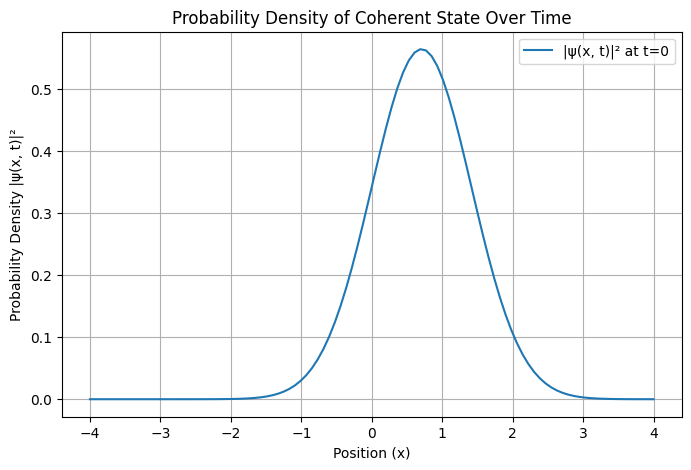

In [ ]:
# Set up the figure
fig, ax = plt.subplots(figsize=(8, 5))
x = np.linspace(-4, 4, 100)  # Range of x values
line, = ax.plot(x, np.abs(coherent_state(x, 0))**2, label="|ψ(x, t)|² at t=0")  # Initialize plot with t = 0

ax.set_xlabel("Position (x)")
ax.set_ylabel("Probability Density |ψ(x, t)|²")
ax.set_title("Probability Density of Coherent State Over Time")
ax.legend()
ax.grid()

# Function to update the plot for each frame
def update(t):
    y = np.abs(coherent_state(x, t))**2
    line.set_ydata(y)
    return line,

# Create the animation and save it
ani = FuncAnimation(fig, update, frames=np.linspace(0, 4*np.pi, 100), interval=40, blit=True)
ani.save('coherent_state.gif', writer=PillowWriter(fps=30))
